In [1]:
import numpy as np
import pandas as pd

In [2]:
%precision 3
pd.set_option('precision', 3)

df = pd.read_csv('ch2_scores_em.csv',
               index_col='生徒番号')

en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

scores_df = pd.DataFrame({'英語':en_scores,
                         '数学':ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                      name='生徒'))
scores_df

,数学,英語
生徒,,
A,65,42
B,80,69
C,63,56
D,63,41
E,76,57
F,60,48
G,81,65
H,66,49
I,78,65


In [3]:
summary_df = scores_df.copy()

summary_df['英語の偏差'] =\
summary_df['英語'] - summary_df['英語'].mean()

summary_df['数学の偏差'] =\
summary_df['数学'] - summary_df['数学'].mean()

summary_df['偏差同士の積']=\
summary_df['英語の偏差'] * summary_df['数学の偏差']

summary_df

,数学,英語,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,65,42,-13.0,-6.4,83.2
B,80,69,14.0,8.6,120.4
C,63,56,1.0,-8.4,-8.4
D,63,41,-14.0,-8.4,117.6
E,76,57,2.0,4.6,9.2
F,60,48,-7.0,-11.4,79.8
G,81,65,10.0,9.6,96.0
H,66,49,-6.0,-5.4,32.4
I,78,65,10.0,6.6,66.0


In [4]:
summary_df['偏差同士の積'].mean()

62.800

In [5]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[ 86.  ,  62.8 ],
       [ 62.8 ,  68.44]])

In [6]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [7]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [8]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

In [9]:
np.cov(en_scores, ma_scores, ddof=0)[0,1]/\
(np.std(en_scores) * np.std(ma_scores))


0.819

In [10]:
np.corrcoef(en_scores, ma_scores)

array([[ 1.   ,  0.819],
       [ 0.819,  1.   ]])

In [11]:
scores_df.corr()

,数学,英語
数学,1.000,0.819
英語,0.819,1.000


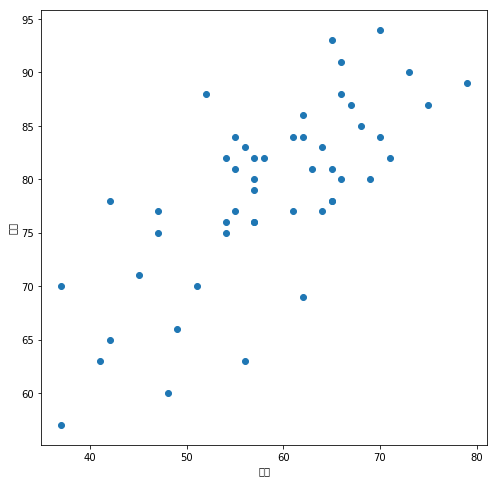

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('英語')
ax.set_ylabel('数学')

plt.show()

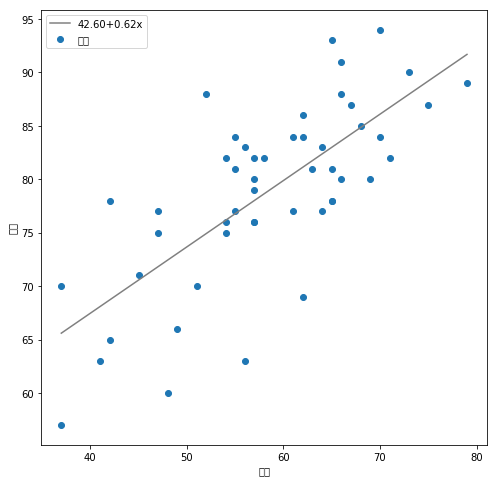

In [13]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_ld = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_ld(xs)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('英語')
ax.set_ylabel('数学')
ax.scatter(english_scores, math_scores, label='点数')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.legend(loc='upper left')

plt.show()

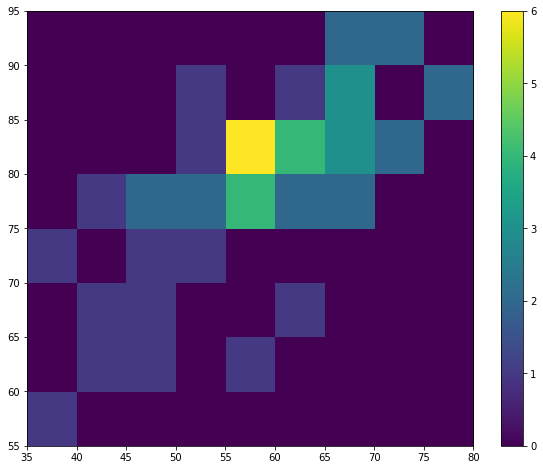

In [14]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
c = ax.hist2d(english_scores, math_scores,
             bins=[9, 8], range=[(35, 80), (55, 95)])

ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)

plt.show()


In [15]:
anscombe_data = np.load('ch3_anscombe.npy')

print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[ 10.  ,   8.04],
       [  8.  ,   6.95],
       [ 13.  ,   7.58],
       [  9.  ,   8.81],
       [ 11.  ,   8.33],
       [ 14.  ,   9.96],
       [  6.  ,   7.24],
       [  4.  ,   4.26],
       [ 12.  ,  10.84],
       [  7.  ,   4.82],
       [  5.  ,   5.68]])

In [16]:
stats_df = pd.DataFrame(index=['Xの平均', 'Xの分散', 'Yの平均', 
                               'Yの分散', 'XとYの相関係数', 'XとYの回帰直線'])

for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data(i+1)'] =\
    [f'{np.mean(dataX):.2f}',
    f'{np.var(dataX):.2f}',
    f'{np.mean(dataY):.2f}',
    f'{np.var(dataY):.2f}',
    f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
    f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
    
stats_df

,data(i+1)
Xの平均,9.00
Xの分散,10.00
Yの平均,7.50
Yの分散,3.75
XとYの相関係数,0.82
XとYの回帰直線,3.00+0.50x


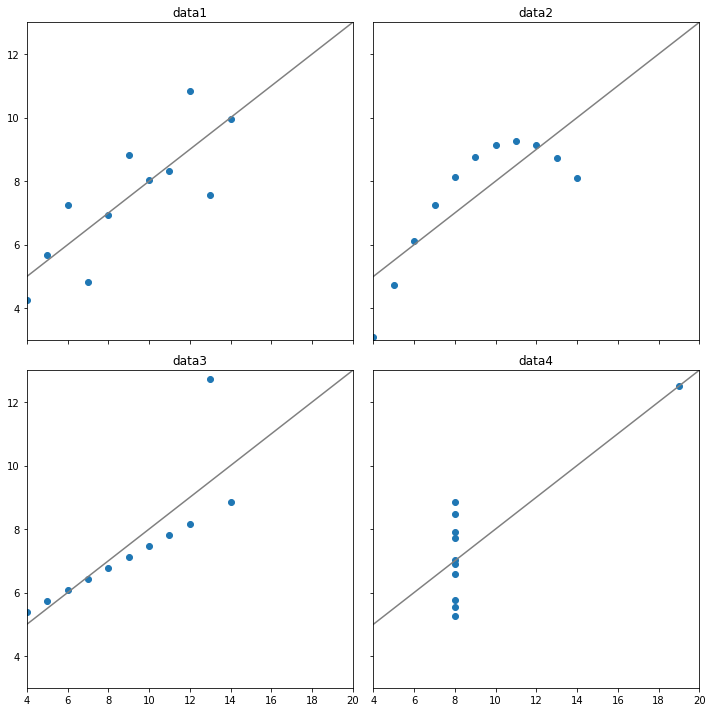

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                        sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i , data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:, 0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')
    
plt.tight_layout()
plt.show()